#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

## Load Dataset

In [45]:
# Read CSV
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [46]:
df.duplicated().any()

True

Periksa apakah ada missing values

In [47]:
df.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Periksa outlier dengan boxplot untuk setiap kolom feature

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


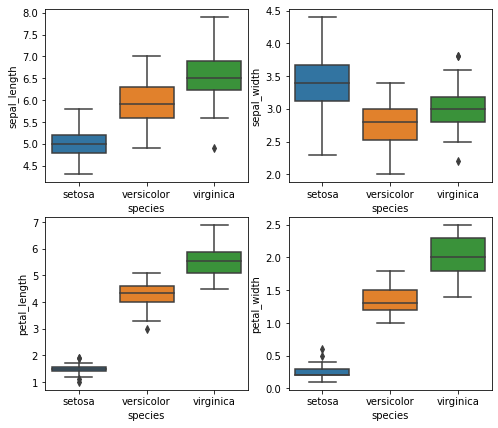

In [68]:
# le = LabelEncoder()
# df["species"] = le.fit_transform(df["species"])

fig, axes = plt.subplots(2, 2, figsize=(8,7))
sns.boxplot(x=df["species"], y=df["sepal_length"], orient='v', ax=axes[0,0])
sns.boxplot(x=df["species"], y=df["sepal_width"], orient='v', ax=axes[0,1])
sns.boxplot(x=df["species"], y=df["petal_length"], orient='v', ax=axes[1,0])
sns.boxplot(x=df["species"], y=df["petal_width"], orient='v', ax=axes[1,1])
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [69]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [72]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [73]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Uji model dengan dataset test

In [76]:
model = LogisticRegression()
model.fit(X_train,y_train)
print(y_train)

['setosa' 'versicolor' 'versicolor' 'setosa' 'setosa' 'virginica'
 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'setosa' 'virginica' 'versicolor' 'setosa' 'virginica'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'setosa'
 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'setosa' 'virginica' 'virginica' 'virginica' 'virginica' 'setosa'
 'setosa' 'virginica' 'virginica' 'setosa' 'virginica' 'setosa'
 'virginica' 'virginica' 'setosa' 'setosa' 'virginica' 'setosa' 'setosa'
 'setosa' 'versi

In [78]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[3 0 0]
 [0 8 0]
 [0 0 4]]
Accuracy Score:  1.0


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [79]:
gnb = GaussianNB()

Uji hasil model dengan data test

In [80]:
gnb.fit(X_train,y_train)
print(y_train)

['setosa' 'versicolor' 'versicolor' 'setosa' 'setosa' 'virginica'
 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'setosa' 'virginica' 'versicolor' 'setosa' 'virginica'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'setosa'
 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'setosa' 'virginica' 'virginica' 'virginica' 'virginica' 'setosa'
 'setosa' 'virginica' 'virginica' 'setosa' 'virginica' 'setosa'
 'virginica' 'virginica' 'setosa' 'setosa' 'virginica' 'setosa' 'setosa'
 'setosa' 'versi

Ukur akurasi dari model persamaan Naive Bayes Classifier

In [81]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[3 0 0]
 [0 8 0]
 [0 0 4]]
Accuracy Score:  1.0


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [83]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")

Uji model dengan data test

In [84]:
knn_classifier.fit(X_train, y_train)
print(y_train)

['setosa' 'versicolor' 'versicolor' 'setosa' 'setosa' 'virginica'
 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'setosa' 'virginica' 'versicolor' 'setosa' 'virginica'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'setosa'
 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'setosa' 'virginica' 'virginica' 'virginica' 'virginica' 'setosa'
 'setosa' 'virginica' 'virginica' 'setosa' 'virginica' 'setosa'
 'virginica' 'virginica' 'setosa' 'setosa' 'virginica' 'setosa' 'setosa'
 'setosa' 'versi

Ukur akurasi dari model K-Nearest Neighbor

In [85]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[3 0 0]
 [0 8 0]
 [0 0 4]]
Accuracy Score:  1.0


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

In [ ]:
#Kesimpulan yang bisa didapat adalah ketiga model memiliki akurasi yang sama tingginya yaitu 1.0.